# UNDERSTANDING THE PROBLEM AND METHOD OF APPROACH

#### Twitter is one of the most actively used social media platform, and it natural that is a warehouse of tons of data. In regards to Twitter, it contains most of its data in the form of text (tweets). Now, since tweets are essentially a source used by people to express opinions, it surely contains one of the most vital characteristics of language; sentiments. And thus, with this project, we will try to analyse the positive and negative sentiments among a large pool of tweets. 

#### Using Natural Language Processing, sentiments in text can be analysed. In this, I'll be using Naive Bayes Classification to classify the tweet as 'Positive' or 'Negative'. But before data, I'll be exploring the dataset and also plotting a WordCloud.  

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Loading the data
tweets_df = pd.read_csv('twitter.csv')

In [7]:
tweets_df.describe()

,id,label
count,21907.000000,21907.000000
mean,20836.322865,0.102342
std,6694.903265,0.303104
min,14.000000,0.000000
25%,15532.500000,0.000000
50%,21009.000000,0.000000
75%,26485.500000,0.000000
max,31962.000000,1.000000


In [8]:
# we'll be discarding the ID column 
tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df.describe()

,label
count,21907.000000
mean,0.102342
std,0.303104
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## EXPLORING THE DATASET

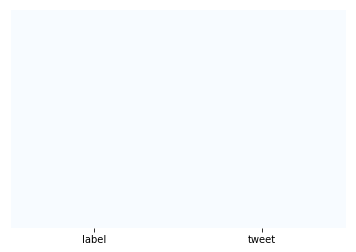

In [9]:
# checking for the presence of null values 
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232D6E6F550>]],
      dtype=object)

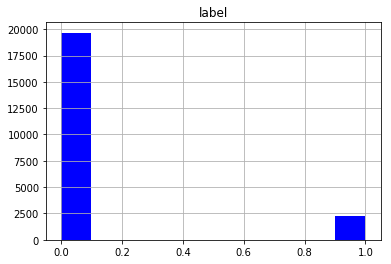

In [11]:
# the following graph shows that we have an unbalanced dataset, with most of our tweets being positive in nature
tweets_df.hist(bins = 10, color = 'blue')

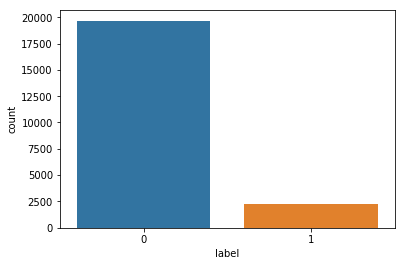

In [16]:
# plotting the tweet frequency in each label using seaborn countplot
sns.countplot(tweets_df['label'])

In [12]:
# Finding length of the tweets
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [13]:
tweets_df.describe()

,label,length
count,21907.000000,21907.000000
mean,0.102342,84.683069
std,0.303104,29.601699
min,0.000000,11.000000
25%,0.000000,62.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


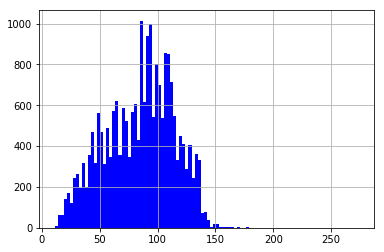

In [18]:
# plotting histogram based on tweet length 
tweets_df['length'].hist(bins=100,color='blue')

## PLOTTING THE WORDCLOUD

In [19]:
sentences = tweets_df['tweet'].tolist()
sentences

['my biggest accomplishments are my snapchat streaks  ',
 "finally water i don't go into anafalactic shock in #lifeistogood   #sweet #nocomplaints @user ",
 'my 7 &amp; 13yr olds know to freeze where they are when emergency vehicles are near. how do adults not know this?    ',
 '@user @user whenever we hear the word #relocate we get  . #pmr for #relocation- watch- ',
 ' @user @user $70 billion in debt. lowering minimum wage &amp; raising taxes will only do so much. republicans just want to suck pr dâ\x80¦',
 'quotestags_app #heabroken   #breakup  #quote #quotestags ',
 "happy father's day , but my father is gone . i'm so sad i'm cryingó¾\x8c¨ó¾\x8c¹ó¾\x8c¹ó¾\x8c¹ó¾\x8c¹   #fathersday i will always remember him love you dad",
 'looking to feel more #joy? join me and 20 speakers on the free summit #unleashyourjoy    ',
 'super excited! we are giving our notices to marry today! #wedding #2017  ',
 'chin up! just smile. ð\x9f\x98\x80  #smile   #ootd #outfitoftheday #fashion #denim #yellow 

In [20]:
string_sentences = ' '.join(sentences)

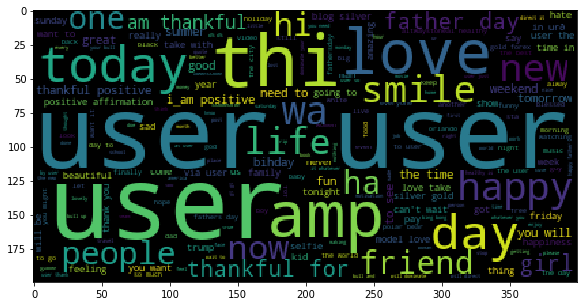

In [22]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(10,5))
plt.imshow(WordCloud().generate(string_sentences))

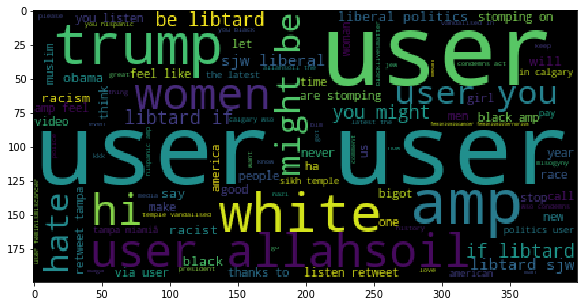

In [24]:
# plotting the WordCloud of the negative tweets
negative = tweets_df[tweets_df['label']==1]
negative_list = negative['tweet'].tolist()
string_negative = ' '.join(negative_list)
plt.figure(figsize=(10,5))
plt.imshow(WordCloud().generate(string_negative))

## PERFORM DATA CLEANING: REMOVING PUNCTUATION, STOPWORDS AND PERFORMING COUNT VECTORIZATION 

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# Importing Natural Language Tool Kit 
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pandy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
# defining a function to remove stop words and punctuation 

def remove_shit(testfile):
    testfile = [char for char in testfile if char not in string.punctuation]
    testfile = ''.join(testfile)
    testfile = [word for word in testfile.split() if word.lower() not in stopwords.words('english')]
    return testfile

In [29]:
# applying the function on tweets
tweets_df_clean = tweets_df['tweet'].apply(remove_shit)

In [33]:
# show the original version
print(tweets_df['tweet'][15]) 

over privileged black child who's been brainwashed into believing a misconstrued version of america   


In [32]:
# show the cleaned up version
print(tweets_df_clean[15])

['privileged', 'black', 'child', 'whos', 'brainwashed', 'believing', 'misconstrued', 'version', 'america']


### PERFORMING COUNT VECTORIZATION 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = remove_shit)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [35]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
tweets_countvectorizer.shape

(21907, 36688)

In [37]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

In [38]:
X = tweets

In [41]:
pd.options.display.max_rows = 10
X

,0,1,2,3,4,5,6,7,8,9,...,36678,36679,36680,36681,36682,36683,36684,36685,36686,36687
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y = tweets_df['label']

## USING A NAIVE BAYES CLASSIFIER MODEL

In [43]:
X.shape

(21907, 36688)

In [44]:
y.shape

(21907,)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## ASSESS PERFORMANCE OF THE TRAINED MODEL 

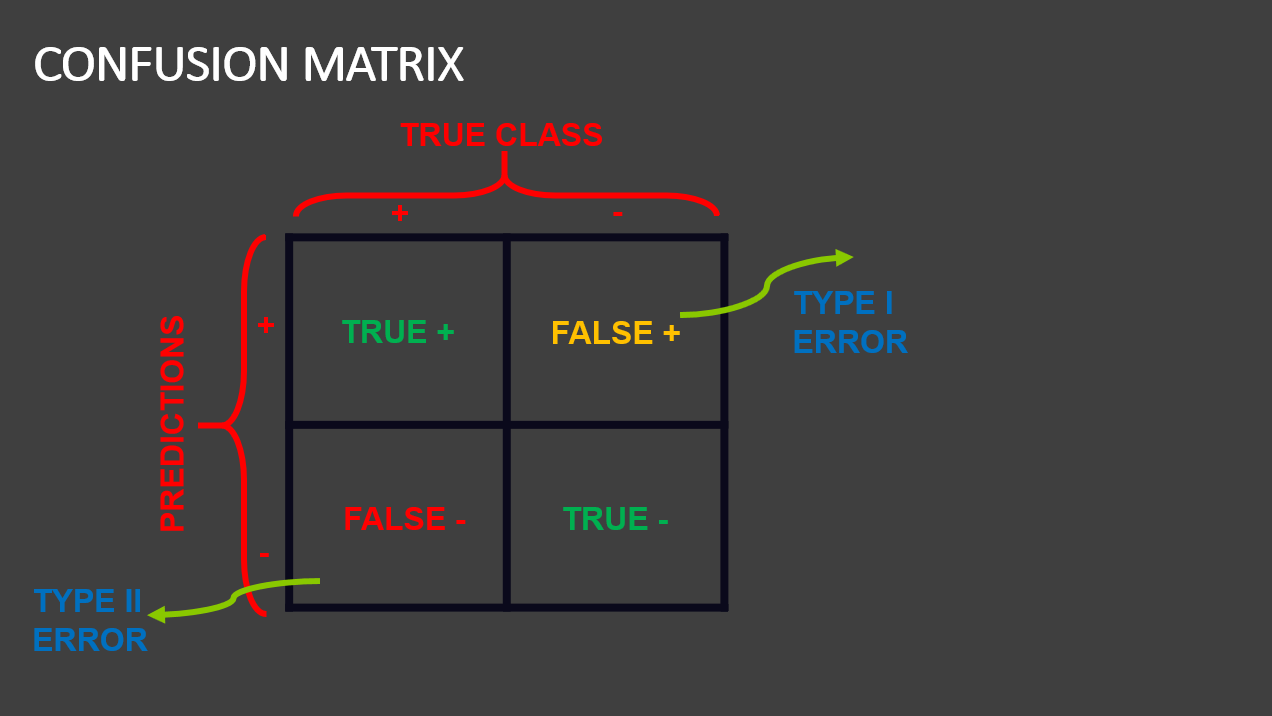

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

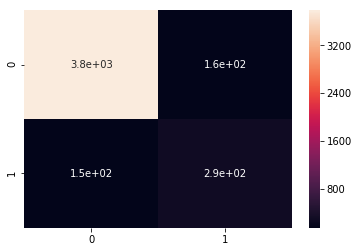

In [49]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [50]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3946
           1       0.64      0.67      0.65       436

   micro avg       0.93      0.93      0.93      4382
   macro avg       0.80      0.81      0.81      4382
weighted avg       0.93      0.93      0.93      4382

